/home/vind/P5/experimentation/src/data_preprocess/nist


/tmp/ipykernel_287844/2748860436.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RollingMeanPower'] = data['PowerConsumption'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_287844/2748860436.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['RollingMeanPower'] = data['PowerConsumption'].fillna(method='ffill', inplace=True)


Off Threshold: 60.28571428578289
Idle Threshold: 39.9999999999916
On Threshold: 1128.5500000001778
                           PowerConsumption  RollingMeanPower State
Timestamp                                                          
2021-04-02 14:15:00+00:00       1718.428571       1718.428571    on
2021-04-02 14:30:00+00:00       1530.571429       1624.500000    on
2021-04-02 14:45:00+00:00       2058.000000       1794.285714    on
2021-04-02 15:00:00+00:00        535.500000       1296.750000    on
2021-04-02 15:15:00+00:00        507.928571        521.714286    on


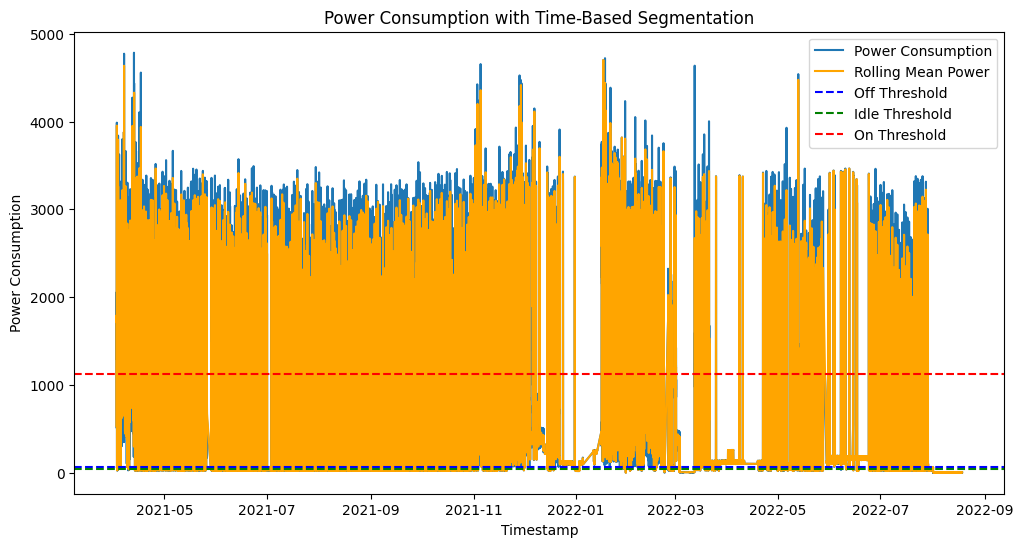

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())

data = pd.read_csv("/home/vind/P5/experimentation/src/data_preprocess/dataset/NIST_cleaned.csv", parse_dates=["Timestamp"])

time_window = '30min'
data.set_index('Timestamp', inplace=True)
data['RollingMeanPower'] = data['PowerConsumption'].fillna(method='ffill', inplace=True)
data['RollingMeanPower'] = data['PowerConsumption'].rolling(time_window).mean()

# Define thresholds using percentiles
off_threshold = data['RollingMeanPower'].quantile(0.385)  
idle_threshold = data['RollingMeanPower'].quantile(0.25)  
on_threshold = data['RollingMeanPower'].quantile(0.9)    

def categorize_state(power):
    if power <= off_threshold:
        return 'off'
    elif off_threshold < power <= idle_threshold:
        return 'idle'
    else:
        return 'on'

data['State'] = data['RollingMeanPower'].apply(categorize_state)

print("Off Threshold:", off_threshold)
print("Idle Threshold:", idle_threshold)
print("On Threshold:", on_threshold)
print(data[['PowerConsumption', 'RollingMeanPower', 'State']].head())

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PowerConsumption'], label='Power Consumption')
plt.plot(data.index, data['RollingMeanPower'], label='Rolling Mean Power', color='orange')
plt.axhline(y=off_threshold, color='blue', linestyle='--', label='Off Threshold')
plt.axhline(y=idle_threshold, color='green', linestyle='--', label='Idle Threshold')
plt.axhline(y=on_threshold, color='red', linestyle='--', label='On Threshold')
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Power Consumption')
plt.title('Power Consumption with Time-Based Segmentation')
plt.show()